### This turns the fastas taken in a previous step into variables which can be used within this notebook


In [36]:
from Bio import SeqIO
import json
import os

# List of FASTA file paths
fasta_file_paths = ['../1-get_cycog/data/CyCOG_60000117.prfg.faa', '../1-get_cycog/data/CyCOG_60000359.RecA.faa']  # Add FASTA file paths here

# Loop through each FASTA file
for file_path in fasta_file_paths:
    # Extract the filename from the file path
    file_name = os.path.basename(file_path)
    file_name_without_extension = os.path.splitext(file_name)[0]

    # Dictionary to store sequences for each file
    all_sequences = {}
    
    sequences = SeqIO.parse(file_path, "fasta")
    for seq_record in sequences:
        # Store the sequence ID and sequence string as key-value pairs in the dictionary
        seq_id = seq_record.id
        sequence_str = str(seq_record.seq)
        if seq_id in all_sequences:
            print(f"Warning: Sequence ID '{seq_id}' already exists. Overwriting existing sequence.")
        all_sequences[seq_id] = sequence_str
    
    # Save the dictionary as a JSON file
    output_file = file_name_without_extension + '_all_sequences.json'
    with open(output_file, 'w') as json_file:
        json.dump(all_sequences, json_file)
    
    # Print the name of the output file created
    print(f"Output file created: {output_file}")

# You will have separate JSON files containing all sequences for each FASTA file


Output file created: CyCOG_60000117.prfg_all_sequences.json
Output file created: CyCOG_60000359.RecA_all_sequences.json


### This creates histograms of sequence length for each used fasta using the previous outputs

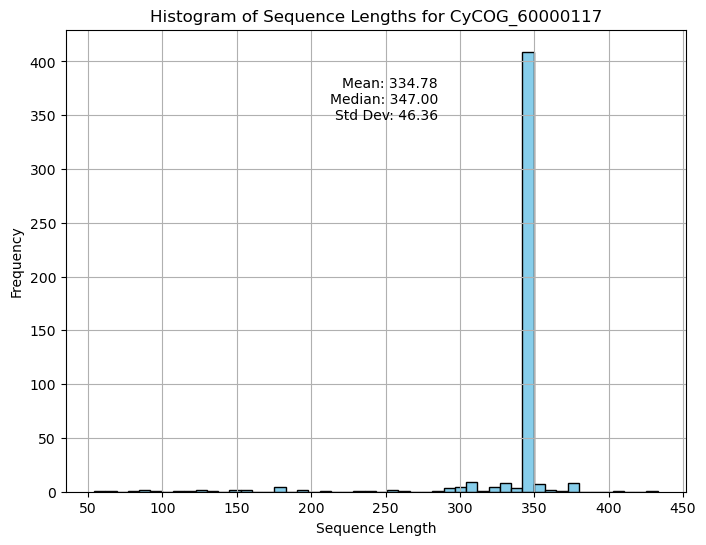

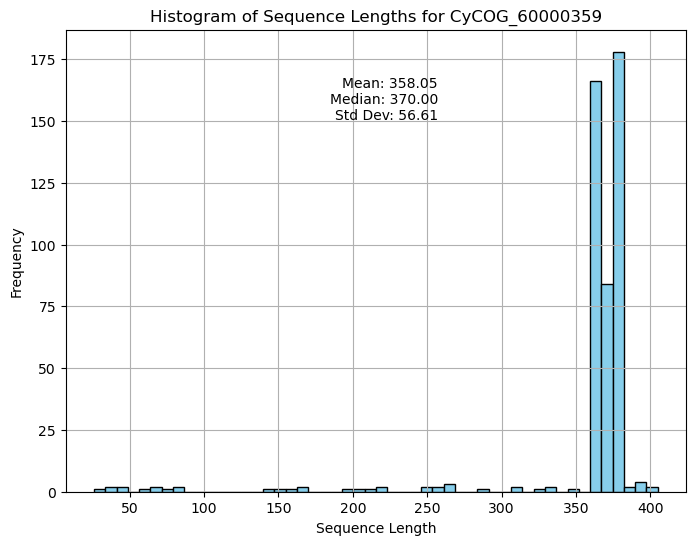

In [37]:
# import json
import numpy as np
import matplotlib.pyplot as plt

# List of JSON file paths
json_file_paths = ['CyCOG_60000117.prfg_all_sequences.json', 'CyCOG_60000359.RecA_all_sequences.json']  # Use filenames from the print function

# Loop through each JSON file
for file_path in json_file_paths:
    # Load sequences from JSON file
    with open(file_path, 'r') as json_file:
        sequences = json.load(json_file)
    
    # Calculate sequence lengths
    sequence_lengths = np.array([len(seq) for seq in sequences.values()])
    
    # Get the first part of the file path as the plot title
    title_text = file_path.split('.')[0]
    
    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(sequence_lengths, bins=50, color='skyblue', edgecolor='black')
    plt.xlabel('Sequence Length')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Sequence Lengths for {title_text}')
    plt.grid(True)
    
    # Calculate statistics
    mean_length = np.mean(sequence_lengths)
    median_length = np.median(sequence_lengths)
    std_dev = np.std(sequence_lengths)
    
    # Annotate statistics onto the plot
    plt.text(0.6, 0.9, f'Mean: {mean_length:.2f}\nMedian: {median_length:.2f}\nStd Dev: {std_dev:.2f}', 
             horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, fontsize=10)
    
    plt.show()


### This creates a file only using sequences close to the median length, within a standard deviation

In [38]:
# import json
# import numpy as np

# List of JSON file paths
json_file_paths = ['CyCOG_60000117.prfg_all_sequences.json', 'CyCOG_60000359.RecA_all_sequences.json']  # Add your JSON file paths here

# Loop through each JSON file
for file_path in json_file_paths:
    # Load sequences from JSON file
    with open(file_path, 'r') as json_file:
        sequences = json.load(json_file)
    
    # Calculate sequence lengths
    sequence_lengths = np.array([len(seq) for seq in sequences.values()])
    
    # Calculate median and standard deviation
    median_length = np.median(sequence_lengths)
    std_dev = np.std(sequence_lengths)
    
    # Filter sequences within one standard deviation from the median
    filtered_sequences = {seq_id: sequence for seq_id, sequence in sequences.items() if len(sequence) >= median_length - std_dev and len(sequence) <= median_length + std_dev}
    
    # Write filtered sequences to a new JSON file
    output_file = file_path.split('.')[0] + '_filtered_sequences.json'
    with open(output_file, 'w') as json_out:
        json.dump(filtered_sequences, json_out)
    
    # Print the name of the output file
    print(f"Output file created: {output_file}")

# Output JSON files containing filtered sequences


Output file created: CyCOG_60000117_filtered_sequences.json
Output file created: CyCOG_60000359_filtered_sequences.json


### This makes histograms with the new outputs, and saves the histograms

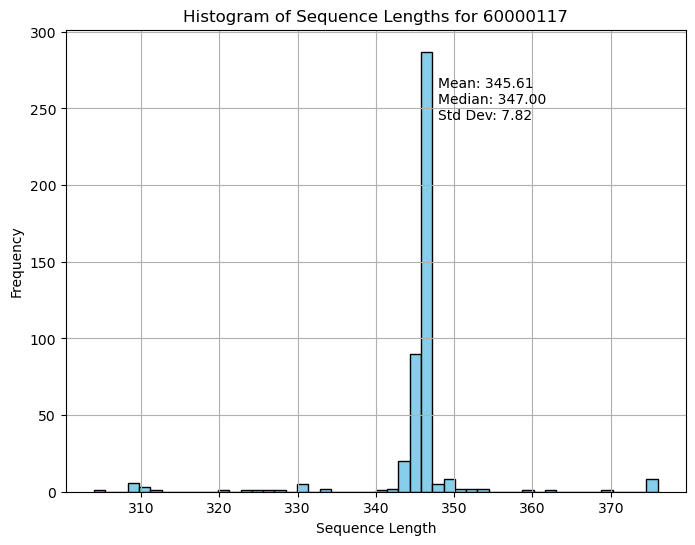

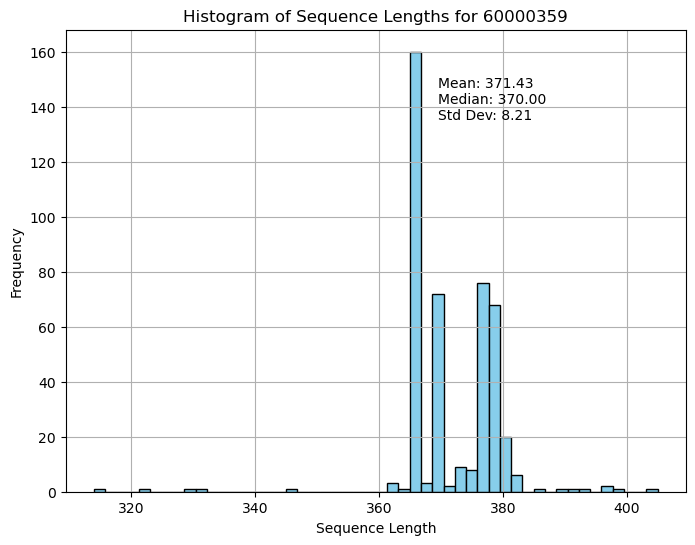

In [41]:
# import json
# import numpy as np
# import matplotlib.pyplot as plt
# import os

# Ensure the existence of the data folder
data_folder = 'data'
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# List of JSON file paths
json_file_paths = ['CyCOG_60000117_filtered_sequences.json', 'CyCOG_60000359_filtered_sequences.json']  # Add your JSON file paths here

# Loop through each JSON file
for file_path in json_file_paths:
    # Load sequences from JSON file
    with open(file_path, 'r') as json_file:
        sequences = json.load(json_file)
    
    # Calculate sequence lengths
    sequence_lengths = np.array([len(seq) for seq in sequences.values()])
    
    # Get the first part of the file path as the plot title
    title_text = file_path.split('_')[1]
    
    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(sequence_lengths, bins=50, color='skyblue', edgecolor='black')
    plt.xlabel('Sequence Length')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Sequence Lengths for {title_text}')
    plt.grid(True)
    
    # Calculate statistics
    mean_length = np.mean(sequence_lengths)
    median_length = np.median(sequence_lengths)
    std_dev = np.std(sequence_lengths)
    
    # Annotate statistics onto the plot
    plt.text(0.6, 0.9, f'Mean: {mean_length:.2f}\nMedian: {median_length:.2f}\nStd Dev: {std_dev:.2f}', 
             horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, fontsize=10)
    
    # Save the figure as a .png file in the data folder
    output_filename = os.path.join(data_folder, f'{title_text}_hist.png')
    plt.savefig(output_filename, bbox_inches='tight')
    
    # Show the plot
    plt.show()


### This removes all of the output files besides the figures to clean the directory

In [42]:
# import os

# List all files in the current directory
files = os.listdir()

# Filter out JSON files
json_files = [file for file in files if file.endswith('.json')]

# Remove each JSON file
for file in json_files:
    try:
        os.remove(file)
        print(f"Removed file: {file}")
    except Exception as e:
        print(f"Error removing file {file}: {e}")


Removed file: CyCOG_60000359.RecA_all_sequences.json
Removed file: CyCOG_60000117_filtered_sequences.json
Removed file: CyCOG_60000117.prfg_all_sequences.json
Removed file: CyCOG_60000359_filtered_sequences.json
